<a href="https://colab.research.google.com/github/AndreiAf02/Job_Satisfaction_Burnout/blob/main/Job_Satisfaction_CZ_Single_Group_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 4.4 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=969ca3429ef6d2de31783d82d269272a295e24cf34423fe19379312f8050c35d
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy.stats import bootstrap, norm
from semopy.multigroup import multigroup
import pymc as pm

## Data Preprocessing:

In [ ]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [ ]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [ ]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [ ]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_cz_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2,2,1.0,57.0,1.0,NaN,1.0,1.0,1.0,9.0,...,2.0,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,1.0
1415,2,2,1.0,40.0,1.0,NaN,2.0,1.0,1.0,5.0,...,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
1416,2,2,2.0,29.0,2.0,Slovenská republika,2.0,1.0,1.0,3.0,...,4.0,4.0,3.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0
1417,2,2,2.0,50.0,1.0,NaN,1.0,1.0,1.0,9.0,...,4.0,3.0,1.0,1.0,NaN,NaN,NaN,5.0,4.0,NaN


In [ ]:
data_cz_job = data_cz_total[['1 Gender:', '2 Age (in years):',
    'CZ_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    # '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    # '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    # '2  gives high priority to job satisfaction', ## KEEP ORDER
    # '3  is good at work planning', ## KEEP ORDER
    # '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # '1 There is a good atmosphere between myself and my colleagues ',
    # '2 There is good co-operation between the colleagues at work',
    # '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? ',
    ## BURNOUT:
    '1 How often have you felt worn out?',
    '2 How often have you been physically exhausted?',
    '3 How often have you been emotionally exhausted?',
    '4 How often have you felt tired?'
]]

In [ ]:
data_cz_job.columns.tolist()

['1 Gender:',
 '2 Age (in years):',
 'CZ_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded resear

In [ ]:
data_cz_job.columns = ['Gender', 'Age',
    'Current_position', ## Current Position
    'Salary',
    # 'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    # 'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # 'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # 'Development_opportunities', ## KEEP ORDER
    # 'Prioritizes_satisfaction', ## KEEP ORDER
    # 'Work_planning', ## KEEP ORDER
    # 'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # 'Good_atmosphere',
    # 'Good_cooperation',
    # 'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction',
    ## BURNOUT:
    'Worn_out',
    'Physically_exhausted',
    'Emotionally_exhausted',
    'Felt_tired']

In [ ]:
data_cz_job.columns.tolist()

['Gender',
 'Age',
 'Current_position',
 'Salary',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction',
 'Worn_out',
 'Physically_exhausted',
 'Emotionally_exhausted',
 'Felt_tired']

In [ ]:
data_cz_job = data_cz_job[data_cz_job['Gender'].isin([1.,2.])]
data_cz_job = data_cz_job.dropna(subset=['Age', 'Current_position']).reset_index(drop=True) #'Leadership_position'
for col in data_cz_job.columns:
  data_cz_job[col] = data_cz_job[col].astype(str).str.replace(',', '.').astype(float)
data_cz_job.to_csv('data_cz_job.csv')
data_cz_job

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,2.0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,1.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
1,1.0,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,...,4.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0
2,2.0,32.0,3.0,NaN,1.5,100.0,NaN,NaN,NaN,NaN,...,1.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0
3,1.0,39.0,4.0,7.931370,NaN,NaN,20.0,20.0,10.0,3.0,...,2.0,4.0,3.0,3.0,1.0,2.0,5.0,4.0,4.0,5.0
4,2.0,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.0,2.5,...,1.0,4.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,2.0,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,...,4.0,3.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,5.0
1373,1.0,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
1374,1.0,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,...,2.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
1375,2.0,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,...,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


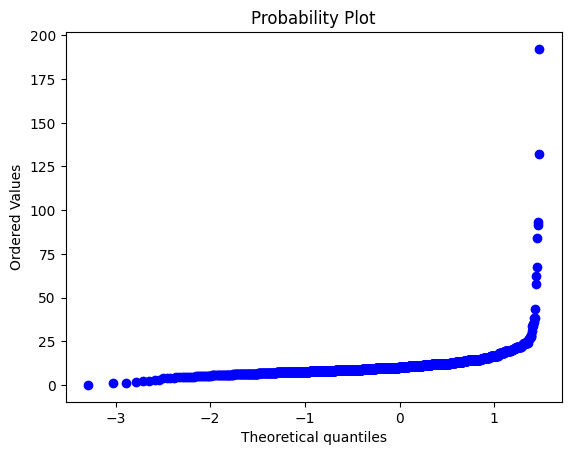

In [ ]:
# sm.qqplot(data_cz_job['Salary'], line='45')
stats.probplot(data_cz_job['Salary'], dist="norm", plot=plt)
# plt.hist(data_cz_job['Salary'])
plt.show()

In [ ]:
## Using the IQR to eliminate outliers for Salary, Average_hours, and Effort:

Q1_salary = data_cz_job['Salary'].quantile(0.25)
Q3_salary = data_cz_job['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 3. * IQR_salary
upper_bound_salary = Q3_salary + 2.8 * IQR_salary

Q1_hrs = data_cz_job['Actual_hrs'].quantile(0.25)
Q3_hrs = data_cz_job['Actual_hrs'].quantile(0.75)
IQR_hrs = Q3_hrs - Q1_hrs

lower_bound_hrs = Q1_hrs - 3. * IQR_hrs
upper_bound_hrs = Q3_hrs + 3. * IQR_hrs

Q1_effort = data_cz_job['Effort'].quantile(0.25)
Q3_effort = data_cz_job['Effort'].quantile(0.75)
IQR_effort = Q3_effort - Q1_effort

lower_bound_effort = Q1_effort - 3.  * IQR_effort
upper_bound_effort = Q3_effort + 3. * IQR_effort




data_cz_job = data_cz_job[(data_cz_job['Salary'] > lower_bound_salary) & (data_cz_job['Salary'] < upper_bound_salary) &
                          (data_cz_job['Actual_hrs'] > lower_bound_hrs) & (data_cz_job['Actual_hrs'] < upper_bound_hrs) &
                           (data_cz_job['Effort'] > lower_bound_effort) & (data_cz_job['Effort'] < upper_bound_effort)].reset_index(drop=True)

data_cz_job

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,2.0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,1.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
1,1.0,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,...,4.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0
2,2.0,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.0,2.5,...,1.0,4.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0
3,2.0,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.0,13.0,...,4.0,5.0,3.0,4.0,2.0,4.0,3.0,2.0,3.0,4.0
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,1.0,NaN,0.5,...,1.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,...,4.0,3.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,5.0
1092,1.0,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
1093,1.0,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,...,2.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
1094,2.0,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,...,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


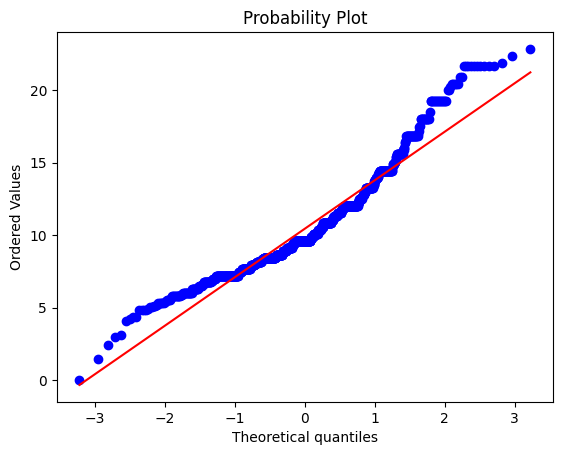

In [ ]:
stats.probplot(data_cz_job['Salary'], dist="norm", plot=plt)
# plt.hist(data_cz_job['Salary'])
plt.show()

In [ ]:
data_cz_job

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,2.0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,1.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
1,1.0,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,...,4.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0
2,2.0,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.0,2.5,...,1.0,4.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0
3,2.0,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.0,13.0,...,4.0,5.0,3.0,4.0,2.0,4.0,3.0,2.0,3.0,4.0
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,1.0,NaN,0.5,...,1.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,...,4.0,3.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,5.0
1092,1.0,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
1093,1.0,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,...,2.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
1094,2.0,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,...,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


In [ ]:
## Interpolating the missing answer data using averages from each job position:
data_cz_job_interpolated = data_cz_job
data_cz_job_interpolated.columns

for i in range(len(data_cz_job_interpolated.columns)-3):
  for j in np.sort(data_cz_job_interpolated['Current_position'].unique()):
    interpolation = data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
    & (data_cz_job_interpolated['Current_position']== j)] = interpolation #data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()

data_cz_job_interpolated.to_csv('data_cz_job_interpolated.csv')
data_cz_job_interpolated



Interpolated Value: 1.0
Interpolated Value: 2.0
Interpolated Value: 3.0
Interpolated Value: 4.0
Interpolated Value: 5.0
Interpolated Value: 6.0
Interpolated Value: 7.0
Interpolated Value: 9.0
Interpolated Value: 9.266051992756836
Interpolated Value: 9.25288552662735
Interpolated Value: 8.875278634518736
Interpolated Value: 10.320503281722468
Interpolated Value: 13.27607971066414
Interpolated Value: 15.270072994827201
Interpolated Value: 9.570152866826898
Interpolated Value: 13.59663499306892
Interpolated Value: 39.738267148014444
Interpolated Value: 37.68421052631579
Interpolated Value: 40.09722222222222
Interpolated Value: 42.169099756691
Interpolated Value: 45.68214285714286
Interpolated Value: 44.70454545454545
Interpolated Value: 39.41203703703704
Interpolated Value: 47.666666666666664
Interpolated Value: 104.30829536989285
Interpolated Value: 108.75
Interpolated Value: 116.67231912144705
Interpolated Value: 114.17152788411914
Interpolated Value: 116.2200630252101
Interpolated Valu

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 2.8333333333333335
Interpolated Value: nan
Interpolated Value: 3.1842105263157894
Interpolated Value: 3.183098591549296
Interpolated Value: 3.2083333333333335
Interpolated Value: 3.194244604316547
Interpolated Value: 3.6511627906976742
Interpolated Value: 3.5233644859813085
Interpolated Value: 3.0
Interpolated Value: nan
Interpolated Value: 2.2432432432432434
Interpolated Value: 2.2285714285714286
Interpolated Value: 2.2493827160493827
Interpolated Value: 1.935251798561151
Interpolated Value: 2.4186046511627906
Interpolated Value: 2.814814814814815
Interpolated Value: 1.8333333333333333
Interpolated Value: 3.512635379061372
Interpolated Value: 3.6578947368421053
Interpolated Value: 3.25
Interpolated Value: 3.372549019607843
Interpolated Value: 3.5142857142857142
Interpolated Value: 3.697674418604651
Interpolated Value: 3.7037037037037037
Interpolated Value: 2.6666666666666665
Interpolated Value: 3.2945454545454544
Interpolated Value: 2.973684210526316
Interpolated V

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,2.0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.000000,15.0,...,3.0,1.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
1,1.0,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.000000,10.0,...,4.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0
2,2.0,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.000000,2.5,...,1.0,4.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0
3,2.0,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.000000,13.0,...,4.0,5.0,3.0,4.0,2.0,4.0,3.0,2.0,3.0,4.0
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,1.0,4.512438,0.5,...,1.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.000000,2.0,...,4.0,3.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,5.0
1092,1.0,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.000000,9.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
1093,1.0,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.000000,8.0,...,2.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
1094,2.0,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.000000,1.0,...,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


In [ ]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_cz_job_w_inversion = data_cz_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_cz_job_w_inversion[col].unique()))
  data_cz_job_w_inversion[col] = max(data_cz_job_w_inversion[col])+1 - data_cz_job_w_inversion[col]
  print(col, ":", np.sort(data_cz_job_w_inversion[col].unique()))

data_cz_job_w_inversion.to_csv('data_cz_job_w_inversion.csv')
data_cz_job_w_inversion



Before: Follow_commands : [1.         2.         3.         3.05365854 3.29454545 4.
 5.        ]
Follow_commands : [1.         2.         2.70545455 2.94634146 3.         4.
 5.        ]
Before: Do_differently : [1.         2.         3.         3.34579439 3.68226601 4.
 5.        ]
Do_differently : [1.         2.         2.31773399 2.65420561 3.         4.
 5.        ]
Before: Forced_to_do : [1.         2.         2.95121951 3.         4.         5.        ]
Forced_to_do : [1.         2.         3.         3.04878049 4.         5.        ]


,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,2.0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.000000,15.0,...,3.0,1.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,3.0
1,1.0,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.000000,10.0,...,2.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0
2,2.0,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.000000,2.5,...,5.0,4.0,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0
3,2.0,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.000000,13.0,...,2.0,5.0,3.0,4.0,2.0,4.0,3.0,2.0,3.0,4.0
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,1.0,4.512438,0.5,...,5.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.000000,2.0,...,2.0,3.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,5.0
1092,1.0,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.000000,9.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
1093,1.0,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.000000,8.0,...,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
1094,2.0,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.000000,1.0,...,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


In [ ]:
data_cz_formatted = data_cz_job_w_inversion

data_cz_formatted = data_cz_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_cz_formatted['Teaching_percent'] = data_cz_formatted['Teaching_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted['Research_percent'] = data_cz_formatted['Research_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted = data_cz_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_cz_formatted['Academic_Resources'] = data_cz_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_cz_formatted['Perceived_Autonomy'] = data_cz_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


# Calculating average score for Burnout:
data_cz_formatted['Burnout'] = data_cz_formatted[['Worn_out', 'Physically_exhausted',
                                                  'Emotionally_exhausted', 'Felt_tired']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Worn_out', 'Physically_exhausted',
                                            'Emotionally_exhausted', 'Felt_tired'],axis=1)


## Calculating average score for Leadership quality:
# data_cz_formatted['Leadership_quality'] = data_cz_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']].mean(axis=1)
# data_cz_formatted = data_cz_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
# data_cz_formatted['Sense_of_community'] = data_cz_formatted[['Good_atmosphere', 'Good_cooperation',
#                                                              'Part_of_community']].mean(axis=1)
# data_cz_formatted = data_cz_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_cz_formatted['Job_satisfaction'] = data_cz_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_cz_formatted.to_csv('data_cz_formatted.csv')
print(data_cz_formatted.columns.tolist())

['Gender', 'Age', 'Current_position', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Burnout', 'Job_satisfaction']


In [ ]:
data_cz_formatted

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Burnout,Job_satisfaction
0,2.0,28.0,3.0,9.613782,50.0,125.0,1.0,10.000000,58.000000,3.166667,1.833333,4.00,2.2
1,1.0,33.0,3.0,4.326923,50.0,125.0,1.0,10.000000,60.000000,3.000000,1.500000,4.00,2.4
2,2.0,39.0,4.0,9.613782,40.0,100.0,2.0,64.077670,19.417476,4.000000,4.500000,5.00,2.8
3,2.0,44.0,4.0,13.699640,40.0,100.0,5.0,50.000000,5.000000,3.166667,3.333333,3.00,3.6
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,33.287331,11.095777,3.115325,4.166667,2.25,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,1.0,42.500000,42.500000,3.833333,2.666667,3.75,2.6
1092,1.0,57.0,6.0,12.017228,40.0,100.0,5.0,52.941176,17.647059,3.833333,4.333333,3.00,4.0
1093,1.0,40.0,4.0,10.334816,40.0,100.0,4.0,55.000000,15.000000,3.833333,4.000000,2.75,4.0
1094,2.0,29.0,4.0,9.613782,40.0,100.0,1.0,62.500000,12.500000,3.166667,3.500000,3.25,3.4


In [ ]:
## Taking only academic seniority positions:

# data_cz_formatted_academic = data_cz_formatted[~data_cz_formatted['Current_position'].isin([1., 9.])]
data_cz_formatted_academic = data_cz_formatted[data_cz_formatted['Current_position'].isin([3., 4., 5., 6.])]

np.sort(data_cz_formatted_academic['Current_position'].unique())

array([3., 4., 5., 6.])

In [ ]:
data_cz_formatted_academic['Age_centered'] = data_cz_formatted_academic['Age'] - data_cz_formatted_academic['Age'].mean()

/tmp/ipython-input-618497643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cz_formatted_academic['Age_centered'] = data_cz_formatted_academic['Age'] - data_cz_formatted_academic['Age'].mean()


In [ ]:
data_cz_formatted_academic.to_csv('data_cz_formatted_seniority.csv')
data_cz_formatted_academic

,Gender,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Burnout,Job_satisfaction,Age_centered
0,2.0,28.0,3.0,9.613782,50.0,125.0,1.0,10.000000,58.000000,3.166667,1.833333,4.00,2.2,-16.947526
1,1.0,33.0,3.0,4.326923,50.0,125.0,1.0,10.000000,60.000000,3.000000,1.500000,4.00,2.4,-11.947526
2,2.0,39.0,4.0,9.613782,40.0,100.0,2.0,64.077670,19.417476,4.000000,4.500000,5.00,2.8,-5.947526
3,2.0,44.0,4.0,13.699640,40.0,100.0,5.0,50.000000,5.000000,3.166667,3.333333,3.00,3.6,-0.947526
4,2.0,58.0,4.0,8.652404,20.0,100.0,3.0,33.287331,11.095777,3.115325,4.166667,2.25,3.6,13.052474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.0,45.0,4.0,8.652404,40.0,100.0,1.0,42.500000,42.500000,3.833333,2.666667,3.75,2.6,0.052474
1092,1.0,57.0,6.0,12.017228,40.0,100.0,5.0,52.941176,17.647059,3.833333,4.333333,3.00,4.0,12.052474
1093,1.0,40.0,4.0,10.334816,40.0,100.0,4.0,55.000000,15.000000,3.833333,4.000000,2.75,4.0,-4.947526
1094,2.0,29.0,4.0,9.613782,40.0,100.0,1.0,62.500000,12.500000,3.166667,3.500000,3.25,3.4,-15.947526


Current_position
3.0     72
4.0    411
5.0    140
6.0     44
Name: count, dtype: int64


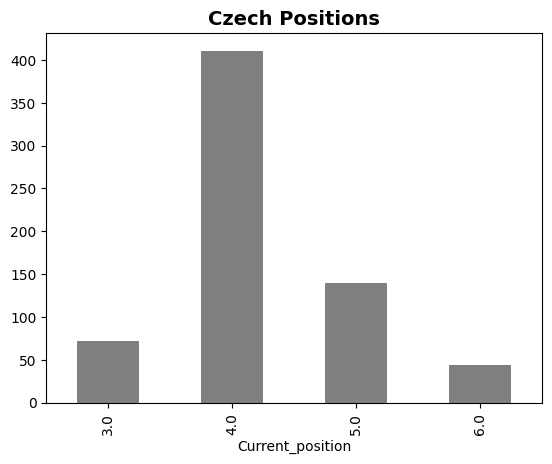

In [ ]:
# plt.figure(dpi=600)
data_cz_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar', color='gray')
plt.title('Czech Positions', fontsize=14, fontweight='bold')
print(data_cz_formatted_academic['Current_position'].value_counts().sort_index())

In [ ]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_cz_formatted_academic = pd.get_dummies(data_cz_formatted_academic, columns=['Current_position'], drop_first=True)

data_cz_formatted_academic = data_cz_formatted_academic.dropna().reset_index(drop=True)

data_cz_formatted_academic['Age'] = data_cz_formatted_academic['Age'] - data_cz_formatted_academic['Age'].mean()

data_cz_formatted_academic = data_cz_formatted_academic.astype(float)

Current_position_col = [col for col in data_cz_formatted_academic.columns if 'Current_position' in col]
Working_condition_cols = [col for col in data_cz_formatted_academic.columns if col not in ['Job_satisfaction','Age',
                                    'Age_centered', 'Burnout', 'Gender', 'Actual_hrs']+Current_position_col]

print(Working_condition_cols)

## Calculating the interaction terms for Age moderator:
for col in Working_condition_cols:
  data_cz_formatted_academic[col+'_mod_Age'] = data_cz_formatted_academic[col] * data_cz_formatted_academic['Age']
  for curr_pos in Current_position_col:
    data_cz_formatted_academic[col+'_mod_'+curr_pos] = data_cz_formatted_academic[col] * data_cz_formatted_academic[curr_pos]

data_cz_formatted_academic.to_csv('data_cz_formatted_academic.csv')

print(data_cz_formatted_academic.columns.tolist())
print(np.shape(data_cz_formatted_academic))

['Salary', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy']
['Gender', 'Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Burnout', 'Job_satisfaction', 'Age_centered', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Salary_mod_Age', 'Salary_mod_Current_position_4.0', 'Salary_mod_Current_position_5.0', 'Salary_mod_Current_position_6.0', 'Effort_mod_Age', 'Effort_mod_Current_position_4.0', 'Effort_mod_Current_position_5.0', 'Effort_mod_Current_position_6.0', 'Policy_influence_mod_Age', 'Policy_influence_mod_Current_position_4.0', 'Policy_influence_mod_Current_position_5.0', 'Policy_influence_mod_Current_position_6.0', 'Teaching_percent_mod_Age', 'Teaching_percent_mod_Current_position_4.0', 'Teaching_percent_mod_Current_position_5.0', 'Teaching_percent_mod_Current_position_6.0', 'Research_percent_mod_Age', 

## Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'CZ Correlation Heatmap')

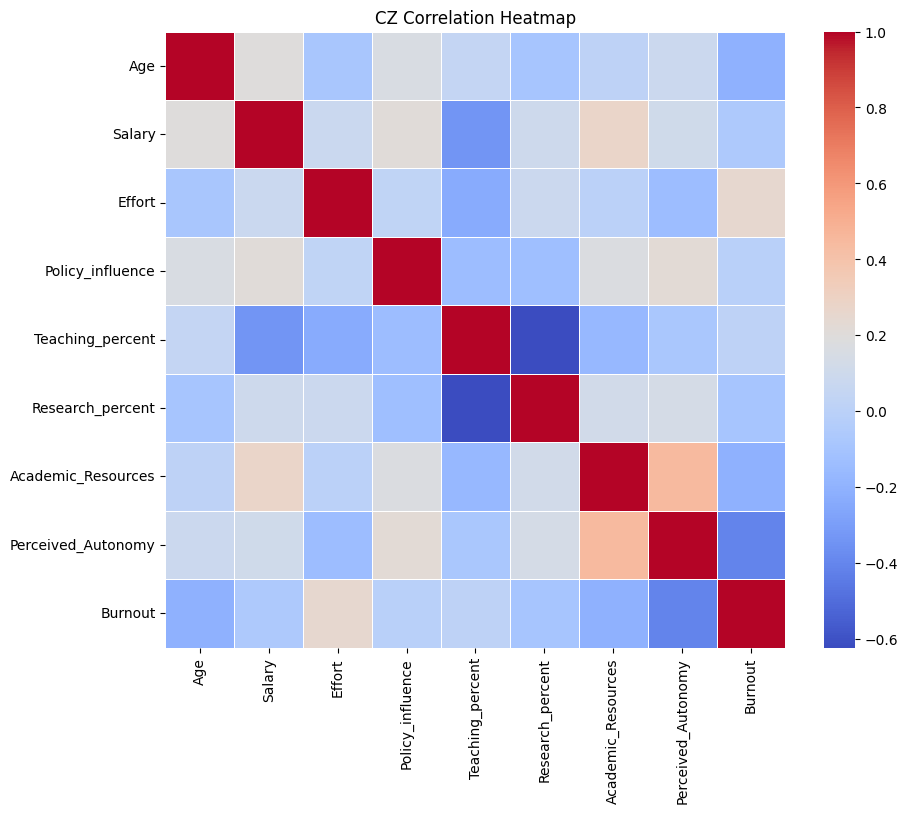

In [ ]:
corr_cols = [col for col in data_cz_formatted_academic.columns if 'mod_Age' not in col
             and 'Job_satisfaction' not in col and 'Actual_hrs' not in col and
             'Gender' not in col and 'Age_centered' not in col and 'Current_position' not in col]
correlations = data_cz_formatted_academic[corr_cols].corr()

plt.figure(figsize=(10, 8)) #, dpi = 600)
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CZ Correlation Heatmap')

In [ ]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_cz_formatted_academic.columns if 'Current_position' in col and 'mod_' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic.columns if 'mod_' in col] ## and 'Age_centered' not in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic.columns if 'Age' not in col and 'Gender' not in col and 'Burnout' not in col and
                          'Actual_hrs' not in col and col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  X = data_cz_formatted_academic[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
               Variable       VIF
0                 const  9.263889
1  Current_position_4.0  2.574713
2  Current_position_5.0  2.326420
3  Current_position_6.0  1.504831
----------------------------------------
Working Conditions:
             Variable         VIF
0               const  110.975788
1              Salary    1.242517
2              Effort    1.098460
3    Policy_influence    1.210135
4    Teaching_percent    2.106511
5    Research_percent    1.882886
6  Academic_Resources    1.338349
7  Perceived_Autonomy    1.358726
----------------------------------------


## Calculating Cronbach's Alpha for the combined factors:

In [ ]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [ ]:
## Academic Resources:

data_cz_for_alpha_academic = data_cz_job_w_inversion[(data_cz_job_w_inversion['Current_position'].isin([3., 4., 5., 6.]))].dropna() #&
                                                    #  (data_cz_job_w_inversion['Contract_duration']<5) &
                                                    #  (data_cz_job_w_inversion['Leadership_position']<4)].dropna()

values = data_cz_for_alpha_academic['Teaching_hrs']/data_cz_for_alpha_academic[['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs']].sum(axis=1)
data_cz_for_alpha_academic = data_cz_for_alpha_academic.drop(values[values.isna()].index)

print(len(data_cz_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_cz_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_cz_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

burnout_for_alpha = np.asarray(data_cz_for_alpha_academic[['Worn_out', 'Physically_exhausted',
                                                           'Emotionally_exhausted', 'Felt_tired']])

# leadership_quality_for_alpha = np.asarray(data_cz_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']])

# sense_of_community_for_alpha = np.asarray(data_cz_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_cz_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
burnout_cron_alpha = Cronbach_alpha_func(burnout_for_alpha, 'Burnout')
# lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
# sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





663
Academic Resources Cronbach Alpha: 0.7860500129802809
Perceived Autonomy Cronbach Alpha: 0.8654488809738153
Burnout Cronbach Alpha: 0.8721622526740811
---------------------
Job Satisfaction Cronbach Alpha: 0.7811826030737858


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [ ]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age', 'Actual_hrs']
Current_position_col = [col for col in data_cz_formatted_academic.columns if 'Current_position' in col and '_mod_' not in col]

Age_Moderation_cols = [col for col in data_cz_formatted_academic.columns if 'mod_Age' in col and 'Actual_hrs' not in col
                   and 'Burnout' not in col and 'Gender' not in col and 'Age_centered' not in col]

Position_Moderation_cols = [col for col in data_cz_formatted_academic.columns if 'mod_Current' in col and 'Actual_hrs' not in col
                   and 'Burnout' not in col and 'Gender' not in col and 'Age_centered' not in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic.columns if 'Age' not in col and 'Burnout' not in col and 'Gender' not in col and
                          col not in Job_satisfaction_col+Age_col+Current_position_col+Age_Moderation_cols + Position_Moderation_cols]

Working_condition_cols

['Salary',
 'Effort',
 'Policy_influence',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy']

In [ ]:
Current_position_col

['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']

In [ ]:
Age_Moderation_cols

['Salary_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age']

In [ ]:
Position_Moderation_cols

['Salary_mod_Current_position_4.0',
 'Salary_mod_Current_position_5.0',
 'Salary_mod_Current_position_6.0',
 'Effort_mod_Current_position_4.0',
 'Effort_mod_Current_position_5.0',
 'Effort_mod_Current_position_6.0',
 'Policy_influence_mod_Current_position_4.0',
 'Policy_influence_mod_Current_position_5.0',
 'Policy_influence_mod_Current_position_6.0',
 'Teaching_percent_mod_Current_position_4.0',
 'Teaching_percent_mod_Current_position_5.0',
 'Teaching_percent_mod_Current_position_6.0',
 'Research_percent_mod_Current_position_4.0',
 'Research_percent_mod_Current_position_5.0',
 'Research_percent_mod_Current_position_6.0',
 'Academic_Resources_mod_Current_position_4.0',
 'Academic_Resources_mod_Current_position_5.0',
 'Academic_Resources_mod_Current_position_6.0',
 'Perceived_Autonomy_mod_Current_position_4.0',
 'Perceived_Autonomy_mod_Current_position_5.0',
 'Perceived_Autonomy_mod_Current_position_6.0']

In [ ]:
Current_position_factors = " + ".join(Current_position_col)
Working_condition_factors = " + ".join(Working_condition_cols)
Position_Moderation_factors = " + ".join(Position_Moderation_cols)


path_no_mod = f"""
Burnout ~ {Working_condition_factors}
Job_satisfaction ~ Burnout + {Working_condition_factors}
"""

path = f"""
Burnout ~ {Working_condition_factors} + {Current_position_factors} + {Position_Moderation_factors}
Job_satisfaction ~ Burnout + {Working_condition_factors} + {Position_Moderation_factors}
"""

# path = f"""
# Job_satisfaction ~ {Working_condition_factors} + {Moderation_factors}
# """




print('Mediation/Moderation Path Model Specification:')
print(path)
print('-----------------------------------')


Mediation/Moderation Path Model Specification:

Burnout ~ Salary + Effort + Policy_influence + Teaching_percent + Research_percent + Academic_Resources + Perceived_Autonomy + Current_position_4.0 + Current_position_5.0 + Current_position_6.0 + Salary_mod_Current_position_4.0 + Salary_mod_Current_position_5.0 + Salary_mod_Current_position_6.0 + Effort_mod_Current_position_4.0 + Effort_mod_Current_position_5.0 + Effort_mod_Current_position_6.0 + Policy_influence_mod_Current_position_4.0 + Policy_influence_mod_Current_position_5.0 + Policy_influence_mod_Current_position_6.0 + Teaching_percent_mod_Current_position_4.0 + Teaching_percent_mod_Current_position_5.0 + Teaching_percent_mod_Current_position_6.0 + Research_percent_mod_Current_position_4.0 + Research_percent_mod_Current_position_5.0 + Research_percent_mod_Current_position_6.0 + Academic_Resources_mod_Current_position_4.0 + Academic_Resources_mod_Current_position_5.0 + Academic_Resources_mod_Current_position_6.0 + Perceived_Autonomy

In [ ]:
model = semopy.Model(path)
result = model.fit(data_cz_formatted_academic)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.003
Number of iterations: 88
Params: -0.021 0.008 0.093 -0.002 0.002 -0.031 -0.143 0.620 0.902 1.308 0.010 0.044 0.032 -0.001 -0.000 0.002 -0.019 -0.070 -0.122 0.004 0.000 -0.011 -0.003 -0.005 -0.025 -0.043 -0.061 0.035 -0.177 -0.351 -0.200 -0.142 0.052 0.005 -0.051 -0.001 -0.003 0.330 0.336 0.003 -0.038 -0.008 -0.005 -0.007 -0.005 0.115 0.137 0.192 -0.000 0.004 0.006 0.000 0.002 0.005 0.214 0.293 0.179 -0.119 -0.076 -0.201 0.472 0.238


In [ ]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF              499.000000
DoF Baseline     559.000000
chi2               1.916326
chi2 p-value       1.000000
chi2 Baseline  45641.365004
CFI                1.011026
GFI                0.999958
AGFI               0.999953
NFI                0.999958
TLI                1.012352
RMSEA              0.000000
AIC              123.994254
BIC              403.167237
LogLik             0.002873
-------------------------


In [ ]:
ins = model.inspect()
print(ins)
ins.to_csv(f'CZ_Model_Single_Group.csv')

                lval  op                                         rval  \
0            Burnout   ~                                       Salary   
1            Burnout   ~                                       Effort   
2            Burnout   ~                             Policy_influence   
3            Burnout   ~                             Teaching_percent   
4            Burnout   ~                             Research_percent   
..               ...  ..                                          ...   
57  Job_satisfaction   ~  Perceived_Autonomy_mod_Current_position_4.0   
58  Job_satisfaction   ~  Perceived_Autonomy_mod_Current_position_5.0   
59  Job_satisfaction   ~  Perceived_Autonomy_mod_Current_position_6.0   
60           Burnout  ~~                                      Burnout   
61  Job_satisfaction  ~~                             Job_satisfaction   

    Estimate  Std. Err    z-value   p-value  
0  -0.020588  0.035410  -0.581405  0.560967  
1   0.007825  0.004137   1.8915

In [ ]:
print(ins[ins['p-value']<0.05])

                lval  op                                         rval  \
24           Burnout   ~    Research_percent_mod_Current_position_6.0   
29           Burnout   ~  Perceived_Autonomy_mod_Current_position_5.0   
31  Job_satisfaction   ~                                      Burnout   
32  Job_satisfaction   ~                                       Salary   
33  Job_satisfaction   ~                                       Effort   
37  Job_satisfaction   ~                           Academic_Resources   
38  Job_satisfaction   ~                           Perceived_Autonomy   
42  Job_satisfaction   ~              Effort_mod_Current_position_4.0   
43  Job_satisfaction   ~              Effort_mod_Current_position_5.0   
47  Job_satisfaction   ~    Policy_influence_mod_Current_position_6.0   
54  Job_satisfaction   ~  Academic_Resources_mod_Current_position_4.0   
55  Job_satisfaction   ~  Academic_Resources_mod_Current_position_5.0   
60           Burnout  ~~                           

In [ ]:
significance = []

for i in range(len(ins)):
  if ins['p-value'].iloc[i] <= 0.001:
    significance.append('***')
  elif 0.001 < ins['p-value'].iloc[i] <= 0.01:
    significance.append('**')
  elif 0.01 < ins['p-value'].iloc[i] <= 0.05:
    significance.append('*')
  else:
    significance.append(' (n.s.)')

ins['Significance'] = significance

ins['Estimate w Significance'] = round(ins['Estimate'],5).astype(str) + ins['Significance']
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value,Significance,Estimate w Significance
0,Burnout,~,Salary,-0.020588,0.035410,-0.581405,0.560967,(n.s.),-0.02059 (n.s.)
1,Burnout,~,Effort,0.007825,0.004137,1.891510,0.058556,(n.s.),0.00783 (n.s.)
2,Burnout,~,Policy_influence,0.093015,0.089517,1.039074,0.298770,(n.s.),0.09301 (n.s.)
3,Burnout,~,Teaching_percent,-0.002212,0.005362,-0.412502,0.679972,(n.s.),-0.00221 (n.s.)
4,Burnout,~,Research_percent,0.001863,0.005881,0.316744,0.751438,(n.s.),0.00186 (n.s.)
...,...,...,...,...,...,...,...,...,...
57,Job_satisfaction,~,Perceived_Autonomy_mod_Current_position_4.0,-0.119105,0.088776,-1.341631,0.179716,(n.s.),-0.11911 (n.s.)
58,Job_satisfaction,~,Perceived_Autonomy_mod_Current_position_5.0,-0.075565,0.100874,-0.749107,0.453792,(n.s.),-0.07557 (n.s.)
59,Job_satisfaction,~,Perceived_Autonomy_mod_Current_position_6.0,-0.201071,0.139071,-1.445819,0.148228,(n.s.),-0.20107 (n.s.)
60,Burnout,~~,Burnout,0.471665,0.025828,18.261982,0.000000,***,0.47166***


## Performing Sobel Test for path effects:

In [ ]:
Sobel_z_stat_df  = pd.DataFrame(columns = ['Path']+Working_condition_cols)
Sobel_p_val_df  = pd.DataFrame(columns = ['Path']+ Working_condition_cols)

# for curr_pos in Current_position_dummy_cols:
Sobel_z = ['Mediation']
Sobel_p = ['Mediation']
for curr_pos in Current_position_col:
  Sobel_z_mod = ['Moderation '+curr_pos]
  Sobel_p_mod = ['Moderation '+curr_pos]
  for work_cond in Working_condition_cols:
    WC_B_mean_mod = float(ins['Estimate'][(ins['rval']==work_cond+'_mod_'+curr_pos) & (ins['lval']=='Burnout')].iloc[0])
    WC_B_std_mod = float(ins['Std. Err'][(ins['rval']==work_cond+'_mod_'+curr_pos) & (ins['lval']=='Burnout')].iloc[0])
    B_JS_mean = float(ins['Estimate'][(ins['rval']=='Burnout') & (ins['lval']=='Job_satisfaction')].iloc[0])
    B_JS_std = float(ins['Std. Err'][(ins['rval']=='Burnout') & (ins['lval']=='Job_satisfaction')].iloc[0])
    z_value_mod = (WC_B_mean_mod*B_JS_mean)/np.sqrt(WC_B_mean_mod**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std_mod**2)
    p_value_two_tailed_mod = 2 * norm.sf(abs(z_value_mod))

    if p_value_two_tailed_mod<=0.001:
      sig_mod = '***'
    elif p_value_two_tailed_mod <= 0.01:
      sig_mod = '**'
    elif p_value_two_tailed_mod <= 0.05:
      sig_mod = '*'
    else:
      sig_mod = ' (n.s.)'
    Sobel_z_mod.append(str(round(WC_B_mean_mod*B_JS_mean,4))+sig_mod)
    Sobel_p_mod.append(p_value_two_tailed_mod)
  Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z_mod
  Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p_mod


Sobel_z_dir_path = ['Direct Path']
Sobel_p_dir_path = ['Direct Path']
for work_cond in Working_condition_cols:
  print(work_cond)
  WC_B_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Burnout')].iloc[0])
  WC_B_std = float(ins['Std. Err'][(ins['rval']==work_cond) & (ins['lval']=='Burnout')].iloc[0])
  B_JS_mean = float(ins['Estimate'][(ins['rval']=='Burnout') & (ins['lval']=='Job_satisfaction')].iloc[0])
  B_JS_std = float(ins['Std. Err'][(ins['rval']=='Burnout') & (ins['lval']=='Job_satisfaction')].iloc[0])
  ## Calculating Sobel Z-value statistic:
  z_value = (WC_B_mean*B_JS_mean)/np.sqrt(WC_B_mean**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std**2)



  WC_JS_Dir_path_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
  z_value_dir_path = float(ins['z-value'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
  p_value_dir_path = float(ins['p-value'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
  if p_value_dir_path <= 0.001:
    sig_dir_path = '***'
  elif p_value_dir_path <= 0.01:
    sig_dir_path = '**'
  elif p_value_dir_path <= 0.05:
    sig_dir_path = '*'
  else:
    sig_dir_path = ' (n.s.)'
  Sobel_z_dir_path.append(str(round(WC_JS_Dir_path_mean,4))+sig_dir_path)
  Sobel_p_dir_path.append(p_value_dir_path)



  ## Calculating two-tailed Sobel p-value:
  p_value_two_tailed = 2 * norm.sf(abs(z_value))

  if p_value_two_tailed<=0.001:
    sig = '***'
  elif p_value_two_tailed <= 0.01:
    sig = '**'
  elif p_value_two_tailed <= 0.05:
    sig = '*'
  else:
    sig = ' (n.s.)'
  Sobel_z.append(str(round(WC_B_mean*B_JS_mean,4))+sig)
  Sobel_p.append(p_value_two_tailed)



Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z
Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p
# Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z_mod
# Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p_mod
Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z_dir_path
Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p_dir_path

Sobel_z_stat_df


Salary
Effort
Policy_influence
Teaching_percent
Research_percent
Academic_Resources
Perceived_Autonomy


,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Moderation Current_position_4.0,-0.0015 (n.s.),0.0002 (n.s.),0.0027 (n.s.),-0.0006 (n.s.),0.0004 (n.s.),0.0061 (n.s.),0.0252 (n.s.)
1,Moderation Current_position_5.0,-0.0063 (n.s.),0.0 (n.s.),0.01 (n.s.),-0.0001 (n.s.),0.0008 (n.s.),0.0087 (n.s.),0.05*
2,Moderation Current_position_6.0,-0.0045 (n.s.),-0.0002 (n.s.),0.0174 (n.s.),0.0016 (n.s.),0.0036*,-0.0049 (n.s.),0.0285 (n.s.)
3,Mediation,0.0029 (n.s.),-0.0011 (n.s.),-0.0132 (n.s.),0.0003 (n.s.),-0.0003 (n.s.),0.0044 (n.s.),0.0204 (n.s.)
4,Direct Path,0.0524*,0.0055*,-0.0512 (n.s.),-0.0007 (n.s.),-0.0033 (n.s.),0.3301***,0.3361***


In [ ]:
Sobel_z_stat_df.set_index('Path').T

Path,Moderation Current_position_4.0,Moderation Current_position_5.0,Moderation Current_position_6.0,Mediation,Direct Path
Salary,-0.0015 (n.s.),-0.0063 (n.s.),-0.0045 (n.s.),0.0029 (n.s.),0.0524*
Effort,0.0002 (n.s.),0.0 (n.s.),-0.0002 (n.s.),-0.0011 (n.s.),0.0055*
Policy_influence,0.0027 (n.s.),0.01 (n.s.),0.0174 (n.s.),-0.0132 (n.s.),-0.0512 (n.s.)
Teaching_percent,-0.0006 (n.s.),-0.0001 (n.s.),0.0016 (n.s.),0.0003 (n.s.),-0.0007 (n.s.)
Research_percent,0.0004 (n.s.),0.0008 (n.s.),0.0036*,-0.0003 (n.s.),-0.0033 (n.s.)
Academic_Resources,0.0061 (n.s.),0.0087 (n.s.),-0.0049 (n.s.),0.0044 (n.s.),0.3301***
Perceived_Autonomy,0.0252 (n.s.),0.05*,0.0285 (n.s.),0.0204 (n.s.),0.3361***


In [ ]:
Sobel_p_val_df.set_index('Path').T

Path,Moderation Current_position_4.0,Moderation Current_position_5.0,Moderation Current_position_6.0,Mediation,Moderation Current_position_6.0,Direct Path
Salary,0.785594,0.281366,0.528649,0.563412,0.528649,0.020149
Effort,0.749023,0.975956,0.820899,0.075592,0.820899,0.014131
Policy_influence,0.841658,0.502129,0.377102,0.308299,0.377102,0.419623
Teaching_percent,0.511008,0.951331,0.312347,0.680925,0.312347,0.809683
Research_percent,0.693962,0.472051,0.048657,0.751886,0.048657,0.387806
Academic_Resources,0.756902,0.706758,0.886759,0.808114,0.886759,0.000096
Perceived_Autonomy,0.173200,0.025672,0.319462,0.232314,0.319462,0.000049


## Path Modelling (No Moderation):

In [ ]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_cz_formatted_academic)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 24
Params: -0.009 0.007 0.051 0.000 -0.002 -0.050 -0.339 -0.156 0.047 0.000 0.067 -0.000 -0.002 0.529 0.222 0.493 0.249


In [ ]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF            2.800000e+01
DoF Baseline   4.300000e+01
chi2           7.706217e-05
chi2 p-value   1.000000e+00
chi2 Baseline  1.636920e+03
CFI            1.017567e+00
GFI            1.000000e+00
AGFI           9.999999e-01
NFI            1.000000e+00
TLI            1.026977e+00
RMSEA          0.000000e+00
AIC            3.400000e+01
BIC            1.105474e+02
LogLik         1.155355e-07
-------------------------


In [ ]:
ins_no_mod = model_no_mod.inspect()
print(ins_no_mod)
# ins_no_mod.to_csv(f'CZ_No_Mod_Model_Parameter_Values_position.csv')

                lval  op                rval  Estimate  Std. Err    z-value  \
0            Burnout   ~              Salary -0.009039  0.008614  -1.049420   
1            Burnout   ~              Effort  0.006899  0.001236   5.579967   
2            Burnout   ~    Policy_influence  0.051113  0.024815   2.059748   
3            Burnout   ~    Teaching_percent  0.000042  0.001958   0.021702   
4            Burnout   ~    Research_percent -0.001781  0.002224  -0.800805   
5            Burnout   ~  Academic_Resources -0.050309  0.042577  -1.181599   
6            Burnout   ~  Perceived_Autonomy -0.338630  0.037041  -9.142001   
7   Job_satisfaction   ~             Burnout -0.156210  0.027511  -5.678051   
8   Job_satisfaction   ~              Salary  0.046911  0.006125   7.658875   
9   Job_satisfaction   ~              Effort  0.000356  0.000899   0.396444   
10  Job_satisfaction   ~    Policy_influence  0.066854  0.017688   3.779729   
11  Job_satisfaction   ~    Teaching_percent -0.0000

## Sobel Test for Path Effects (No Moderation)

In [ ]:
Sobel_z_stat_no_mod  = pd.DataFrame(columns = ['Path']+Working_condition_cols)
Sobel_p_val_no_mod  = pd.DataFrame(columns = ['Path']+ Working_condition_cols)

# for curr_pos in Current_position_dummy_cols:
Sobel_z = ['Mediation']
Sobel_p = ['Mediation']
Sobel_z_dir_path = ['Direct Path']
Sobel_p_dir_path = ['Direct Path']
for work_cond in Working_condition_cols:
  WC_B_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Burnout')].iloc[0])
  WC_B_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Burnout')].iloc[0])
  B_JS_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']=='Burnout') & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  B_JS_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']=='Burnout') & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  ## Calculating Sobel Z-value statistic:
  z_value = (WC_B_mean*B_JS_mean)/np.sqrt(WC_B_mean**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std**2)

  WC_JS_Dir_path_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  z_value_dir_path = float(ins_no_mod['z-value'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  p_value_dir_path = float(ins_no_mod['p-value'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  if p_value_dir_path <= 0.001:
    sig_dir_path = '***'
  elif p_value_dir_path <= 0.01:
    sig_dir_path = '**'
  elif p_value_dir_path <= 0.05:
    sig_dir_path = '*'
  else:
    sig_dir_path = ' (n.s.)'
  Sobel_z_dir_path.append(str(round(WC_JS_Dir_path_mean,4))+sig_dir_path)
  Sobel_p_dir_path.append(p_value_dir_path)



  ## Calculating two-tailed Sobel p-value:
  p_value_two_tailed = 2 * norm.sf(abs(z_value))

  if p_value_two_tailed<=0.001:
    sig = '***'
  elif p_value_two_tailed <= 0.01:
    sig = '**'
  elif p_value_two_tailed <= 0.05:
    sig = '*'
  else:
    sig = ' (n.s.)'
  Sobel_z.append(str(round(WC_B_mean*B_JS_mean,4))+sig)
  Sobel_p.append(p_value_two_tailed)



Sobel_z_stat_no_mod.loc[len(Sobel_z_stat_no_mod)] = Sobel_z
Sobel_p_val_no_mod.loc[len(Sobel_p_val_no_mod)] = Sobel_p
Sobel_z_stat_no_mod.loc[len(Sobel_z_stat_no_mod)] = Sobel_z_dir_path
Sobel_p_val_no_mod.loc[len(Sobel_p_val_no_mod)] = Sobel_p_dir_path

Sobel_z_stat_no_mod

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.0037 (n.s.),-0.0012 (n.s.),-0.0036 (n.s.),0.0003 (n.s.),0.0006 (n.s.),0.0147 (n.s.),0.0787*
1,Direct Path,0.0161 (n.s.),-0.0005 (n.s.),0.0884*,0.0039 (n.s.),-0.0007 (n.s.),0.6275***,0.2562***


In [ ]:
Sobel_z_stat_no_mod.set_index('Path').T

Path,Mediation,Direct Path
Salary,-0.0037 (n.s.),0.0161 (n.s.)
Effort,-0.0012 (n.s.),-0.0005 (n.s.)
Policy_influence,-0.0036 (n.s.),0.0884*
Teaching_percent,0.0003 (n.s.),0.0039 (n.s.)
Research_percent,0.0006 (n.s.),-0.0007 (n.s.)
Academic_Resources,0.0147 (n.s.),0.6275***
Perceived_Autonomy,0.0787*,0.2562***


In [ ]:
Sobel_p_val_no_mod.set_index('Path').T

Path,Mediation,Direct Path
Salary,0.256133,0.253383
Effort,0.060735,0.800247
Policy_influence,0.652580,0.021154
Teaching_percent,0.688306,0.251222
Research_percent,0.449943,0.851317
Academic_Resources,0.371933,0.000000
Perceived_Autonomy,0.022173,0.000187


## Bootstrapping:

In [ ]:
times = 2000

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']


bootstrap_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Path']+Working_condition_cols+Current_position_col+Evaluation_cols)
bootstrap_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Path']+Working_condition_cols+Evaluation_cols)
# moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols)
# mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  if i % 20 ==0:
    print(f'Run: {i}/{times}')
  data_cz_bootstrapped = data_cz_formatted_academic.sample(n=len(data_cz_formatted_academic), replace=True, random_state=i).reset_index(drop=True)

  # model = semopy.Model(path)
  result = model.fit(data_cz_bootstrapped)
  ins = model.inspect()
  # # model_no_mod = semopy.Model(path_no_mod)
  # result_no_mod = model_no_mod.fit(data_cz_bootstrapped)
  # ins_no_mod = model_no_mod.inspect()

  if 'Optimization terminated successfully' in result.message: ## and 'Optimization terminated successfully' in result_no_mod.message:
    # print('Optimization Successful')

    ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
    fit_evaluation = semopy.calc_stats(model)
    # print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

    # for curr_pos in Current_position_dummy_cols:
    med_coeff = [i, 'Mediation']
    dir_path_coeff = [i, 'Direct Path']
    for work_cond in Working_condition_cols+Current_position_col:
      med_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Burnout')].iloc[0]) * float(ins['Estimate'][(ins['rval']=='Burnout') &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
    for work_cond in Working_condition_cols:
      dir_path_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))

    ## Calculating the moderation position effect on the indirect path
    for curr_pos in Current_position_col:
      mod_coeff = [i, 'Burnout Moderation '+curr_pos]
      for work_cond in Working_condition_cols:
        mod_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond+'_mod_'+curr_pos) &
                        (ins['lval']=='Burnout')].iloc[0]) * float(ins['Estimate'][(ins['rval']=='Burnout') &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
      mod_coeff = mod_coeff + [np.nan, np.nan, np.nan] + fit_evaluation.iloc[0].tolist()
      bootstrap_path_values.loc[len(bootstrap_path_values)] = mod_coeff

    ## Calculating the moderation position effect on the direct path
    for curr_pos in Current_position_col:
      mod_coeff_dir = [i, 'Satisfaction Moderation '+curr_pos]
      for work_cond in Working_condition_cols:
        mod_coeff_dir.append(float(ins['Estimate'][(ins['rval']==work_cond+'_mod_'+curr_pos) &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
      mod_coeff_dir = mod_coeff_dir + [np.nan, np.nan, np.nan] + fit_evaluation.iloc[0].tolist()
      bootstrap_path_values.loc[len(bootstrap_path_values)] = mod_coeff_dir


    med_coeff = med_coeff + fit_evaluation.iloc[0].tolist()
    dir_path_coeff = dir_path_coeff + [np.nan, np.nan, np.nan] + fit_evaluation.iloc[0].tolist()
    bootstrap_path_values.loc[len(bootstrap_path_values)] = med_coeff
    bootstrap_path_values.loc[len(bootstrap_path_values)] = dir_path_coeff


    # ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
    # fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    # # print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

    # # for curr_pos in Current_position_dummy_cols:
    # med_coeff_no_mod = [i, 'Mediation']
    # dir_path_coeff_no_mod = [i, 'Direct Path']
    # for work_cond in Working_condition_cols:
    #   med_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
    #                     (ins_no_mod['lval']=='Burnout')].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']=='Burnout') &
    #                     (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
    #   dir_path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
    #                     (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
    # med_coeff_no_mod = med_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
    # dir_path_coeff_no_mod = dir_path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
    # bootstrap_path_values_no_mod.loc[len(bootstrap_path_values_no_mod)] = med_coeff_no_mod
    # bootstrap_path_values_no_mod.loc[len(bootstrap_path_values_no_mod)] = dir_path_coeff_no_mod

  else:
    print('Run:', i)
    print('Optimization Unsuccessful')

bootstrap_path_values

Run: 0/2000
Run: 20/2000
Run: 40/2000
Run: 60/2000
Run: 80/2000
Run: 100/2000
Run: 120/2000
Run: 140/2000
Run: 160/2000
Run: 180/2000
Run: 200/2000
Run: 220/2000
Run: 240/2000
Run: 260/2000
Run: 280/2000
Run: 300/2000
Run: 320/2000
Run: 340/2000
Run: 360/2000
Run: 380/2000
Run: 400/2000
Run: 420/2000
Run: 440/2000
Run: 460/2000
Run: 480/2000
Run: 500/2000
Run: 520/2000
Run: 540/2000
Run: 560/2000
Run: 580/2000
Run: 600/2000
Run: 620/2000
Run: 640/2000
Run: 660/2000
Run: 680/2000
Run: 700/2000
Run: 720/2000
Run: 740/2000
Run: 760/2000
Run: 780/2000
Run: 800/2000
Run: 820/2000
Run: 840/2000
Run: 860/2000
Run: 880/2000
Run: 900/2000
Run: 920/2000
Run: 940/2000
Run: 960/2000
Run: 980/2000
Run: 1000/2000
Run: 1020/2000
Run: 1040/2000
Run: 1060/2000
Run: 1080/2000
Run: 1100/2000
Run: 1120/2000
Run: 1140/2000
Run: 1160/2000
Run: 1180/2000
Run: 1200/2000
Run: 1220/2000
Run: 1240/2000
Run: 1260/2000
Run: 1280/2000
Run: 1300/2000
Run: 1320/2000
Run: 1340/2000
Run: 1360/2000
Run: 1380/2000
Run: 1

,Bootstrap_nr,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Current_position_4.0,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Burnout Moderation Current_position_4.0,-0.002660,0.000149,-0.003693,-0.000087,0.000644,-0.000583,0.014109,NaN,...,46260.000638,1.010843,0.999925,0.999916,0.999925,1.012147,0.000000,123.989590,403.162573,0.005205
1,0,Burnout Moderation Current_position_5.0,-0.009361,-0.000143,0.007498,-0.000228,0.001396,0.012403,0.020971,NaN,...,46260.000638,1.010843,0.999925,0.999916,0.999925,1.012147,0.000000,123.989590,403.162573,0.005205
2,0,Burnout Moderation Current_position_6.0,-0.003375,-0.000433,0.009698,0.001847,0.005040,0.016981,0.005013,NaN,...,46260.000638,1.010843,0.999925,0.999916,0.999925,1.012147,0.000000,123.989590,403.162573,0.005205
3,0,Satisfaction Moderation Current_position_4.0,-0.028430,-0.004120,0.158283,-0.002093,0.001366,0.227368,-0.093510,NaN,...,46260.000638,1.010843,0.999925,0.999916,0.999925,1.012147,0.000000,123.989590,403.162573,0.005205
4,0,Satisfaction Moderation Current_position_5.0,-0.082555,-0.003321,0.180579,0.001721,-0.003783,0.305686,-0.034473,NaN,...,46260.000638,1.010843,0.999925,0.999916,0.999925,1.012147,0.000000,123.989590,403.162573,0.005205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1999,Satisfaction Moderation Current_position_4.0,0.023827,-0.001451,0.017759,-0.004174,-0.004070,0.158039,-0.087305,NaN,...,46802.976657,0.954388,0.944271,0.937570,0.944271,0.948903,0.079668,116.179015,395.351998,3.910492
15996,1999,Satisfaction Moderation Current_position_5.0,-0.041033,-0.001990,0.065497,-0.000381,-0.005061,0.312505,-0.044714,NaN,...,46802.976657,0.954388,0.944271,0.937570,0.944271,0.948903,0.079668,116.179015,395.351998,3.910492
15997,1999,Satisfaction Moderation Current_position_6.0,0.051960,-0.000667,0.142132,0.001730,-0.006440,-0.051154,-0.186457,NaN,...,46802.976657,0.954388,0.944271,0.937570,0.944271,0.948903,0.079668,116.179015,395.351998,3.910492
15998,1999,Mediation,-0.001981,-0.000745,-0.045787,0.000455,-0.000228,-0.033793,0.076010,-0.0964,...,46802.976657,0.954388,0.944271,0.937570,0.944271,0.948903,0.079668,116.179015,395.351998,3.910492


In [ ]:
bootstrap_path_values.to_csv(f'CZ_bootstrap_Single_Group.csv')
# bootstrap_path_values_no_mod.to_csv(f'CZ_bootstrap_path_values_no_mod_position_{position}.csv')

## Bootstrap Results Analysis:

In [ ]:
# path_to_bootstrap = 'https://raw.githubusercontent.com/AndreiAf02/Job-Satisfaction/refs/heads/main/CZ_bootstrap/'

# mediation_path_values = pd.read_csv(path_to_bootstrap+'CZ_mediation_path_values.csv', sep=",", header=0).iloc[:,1:]
# moderation_path_values = pd.read_csv(path_to_bootstrap+'CZ_moderation_path_values.csv', sep=",", header=0).iloc[:,1:]
# mediation_path_values_no_mod = pd.read_csv(path_to_bootstrap+'CZ_mediation_path_values_no_mod.csv', sep=",", header=0).iloc[:,1:]


In [ ]:
bootstrap_path_values

,Bootstrap_nr,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Current_position_4.0,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Burnout Moderation Current_position_4.0,-0.002660,0.000149,-0.003693,-0.000087,0.000644,-0.000583,0.014109,NaN,...,46260.000638,1.010843,0.999925,0.999916,0.999925,1.012147,0.000000,123.989590,403.162573,0.005205
1,0,Burnout Moderation Current_position_5.0,-0.009361,-0.000143,0.007498,-0.000228,0.001396,0.012403,0.020971,NaN,...,46260.000638,1.010843,0.999925,0.999916,0.999925,1.012147,0.000000,123.989590,403.162573,0.005205
2,0,Burnout Moderation Current_position_6.0,-0.003375,-0.000433,0.009698,0.001847,0.005040,0.016981,0.005013,NaN,...,46260.000638,1.010843,0.999925,0.999916,0.999925,1.012147,0.000000,123.989590,403.162573,0.005205
3,0,Satisfaction Moderation Current_position_4.0,-0.028430,-0.004120,0.158283,-0.002093,0.001366,0.227368,-0.093510,NaN,...,46260.000638,1.010843,0.999925,0.999916,0.999925,1.012147,0.000000,123.989590,403.162573,0.005205
4,0,Satisfaction Moderation Current_position_5.0,-0.082555,-0.003321,0.180579,0.001721,-0.003783,0.305686,-0.034473,NaN,...,46260.000638,1.010843,0.999925,0.999916,0.999925,1.012147,0.000000,123.989590,403.162573,0.005205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1999,Satisfaction Moderation Current_position_4.0,0.023827,-0.001451,0.017759,-0.004174,-0.004070,0.158039,-0.087305,NaN,...,46802.976657,0.954388,0.944271,0.937570,0.944271,0.948903,0.079668,116.179015,395.351998,3.910492
15996,1999,Satisfaction Moderation Current_position_5.0,-0.041033,-0.001990,0.065497,-0.000381,-0.005061,0.312505,-0.044714,NaN,...,46802.976657,0.954388,0.944271,0.937570,0.944271,0.948903,0.079668,116.179015,395.351998,3.910492
15997,1999,Satisfaction Moderation Current_position_6.0,0.051960,-0.000667,0.142132,0.001730,-0.006440,-0.051154,-0.186457,NaN,...,46802.976657,0.954388,0.944271,0.937570,0.944271,0.948903,0.079668,116.179015,395.351998,3.910492
15998,1999,Mediation,-0.001981,-0.000745,-0.045787,0.000455,-0.000228,-0.033793,0.076010,-0.0964,...,46802.976657,0.954388,0.944271,0.937570,0.944271,0.948903,0.079668,116.179015,395.351998,3.910492


##Analyzing the bootstrap results:

In [ ]:
mean_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
lbound_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
ubound_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
pbci_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
pbci_90_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)

for path in bootstrap_path_values['Path'].unique().tolist():
  data = bootstrap_path_values[bootstrap_path_values['Path']==path].reset_index(drop=True)
  mean_vals = [path]
  lbound_vals = [path]
  ubound_vals = [path]
  pbci_vals = [path]
  pbci_90_vals = [path]

  for col in Working_condition_cols:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    if lbound > 0. or ubound < 0.:
      sig = ' *'
    else:
      sig = ''
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']'+sig)
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95),4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals
  pbci_90_results.loc[len(pbci_90_results)] = pbci_90_vals



mean_results


,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Burnout Moderation Current_position_4.0,-0.001587,0.000211,0.002924,-0.000585,0.000398,0.007117,0.023980
1,Burnout Moderation Current_position_5.0,-0.006600,0.000063,0.010214,-0.000074,0.000798,0.011515,0.049165
2,Burnout Moderation Current_position_6.0,-0.005186,-0.000154,0.016068,0.001510,0.003670,-0.004554,0.028689
3,Satisfaction Moderation Current_position_4.0,0.007974,-0.005533,0.111671,-0.000228,0.000090,0.208469,-0.115029
4,Satisfaction Moderation Current_position_5.0,-0.033071,-0.006653,0.132132,0.003748,0.001798,0.287560,-0.069692
5,Satisfaction Moderation Current_position_6.0,-0.001887,-0.005562,0.180373,0.006468,0.004320,0.169732,-0.191307
6,Mediation,0.003163,-0.001153,-0.013588,0.000338,-0.000290,0.003355,0.022019
7,Direct Path,0.047382,0.005626,-0.047735,-0.000809,-0.003090,0.333431,0.330500


In [ ]:
lbound_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Burnout Moderation Current_position_4.0,-0.012033,-0.001037,-0.022707,-0.002165,-0.001325,-0.029885,-0.012141
1,Burnout Moderation Current_position_5.0,-0.018875,-0.001316,-0.018945,-0.002029,-0.001184,-0.034359,0.005891
2,Burnout Moderation Current_position_6.0,-0.019144,-0.002165,-0.020550,-0.001333,0.000708,-0.077978,-0.027238
3,Satisfaction Moderation Current_position_4.0,-0.053239,-0.010375,-0.042025,-0.007261,-0.007861,-0.006663,-0.347022
4,Satisfaction Moderation Current_position_5.0,-0.097834,-0.012280,-0.038827,-0.004511,-0.008244,0.045675,-0.321725
5,Satisfaction Moderation Current_position_6.0,-0.085375,-0.013686,-0.028952,-0.005402,-0.009852,-0.197286,-0.530522
6,Mediation,-0.006185,-0.002430,-0.039946,-0.001006,-0.001802,-0.032999,-0.010943
7,Direct Path,-0.017553,0.001114,-0.200614,-0.008005,-0.010250,0.143778,0.097223


In [ ]:
ubound_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Burnout Moderation Current_position_4.0,0.008558,0.001486,0.029970,0.000884,0.002292,0.048189,0.062090
1,Burnout Moderation Current_position_5.0,0.003665,0.001477,0.040329,0.001865,0.002964,0.061541,0.100128
2,Burnout Moderation Current_position_6.0,0.007753,0.001844,0.053962,0.004497,0.007405,0.069086,0.091264
3,Satisfaction Moderation Current_position_4.0,0.074983,-0.001012,0.270827,0.007204,0.007871,0.403831,0.141499
4,Satisfaction Moderation Current_position_5.0,0.037643,-0.001378,0.308460,0.012085,0.011163,0.522858,0.201156
5,Satisfaction Moderation Current_position_6.0,0.081525,0.002884,0.389651,0.020631,0.020986,0.522480,0.142509
6,Mediation,0.013259,-0.000061,0.010646,0.001699,0.001207,0.040384,0.058599
7,Direct Path,0.104700,0.010433,0.108749,0.006072,0.004435,0.540203,0.547972


In [ ]:
pbci_results.set_index('Path').T

Path,Burnout Moderation Current_position_4.0,Burnout Moderation Current_position_5.0,Burnout Moderation Current_position_6.0,Satisfaction Moderation Current_position_4.0,Satisfaction Moderation Current_position_5.0,Satisfaction Moderation Current_position_6.0,Mediation,Direct Path
Salary,"[-0.012, 0.0086]","[-0.0189, 0.0037]","[-0.0191, 0.0078]","[-0.0532, 0.075]","[-0.0978, 0.0376]","[-0.0854, 0.0815]","[-0.0062, 0.0133]","[-0.0176, 0.1047]"
Effort,"[-0.001, 0.0015]","[-0.0013, 0.0015]","[-0.0022, 0.0018]","[-0.0104, -0.001] *","[-0.0123, -0.0014] *","[-0.0137, 0.0029]","[-0.0024, -0.0001] *","[0.0011, 0.0104] *"
Policy_influence,"[-0.0227, 0.03]","[-0.0189, 0.0403]","[-0.0205, 0.054]","[-0.042, 0.2708]","[-0.0388, 0.3085]","[-0.029, 0.3897]","[-0.0399, 0.0106]","[-0.2006, 0.1087]"
Teaching_percent,"[-0.0022, 0.0009]","[-0.002, 0.0019]","[-0.0013, 0.0045]","[-0.0073, 0.0072]","[-0.0045, 0.0121]","[-0.0054, 0.0206]","[-0.001, 0.0017]","[-0.008, 0.0061]"
Research_percent,"[-0.0013, 0.0023]","[-0.0012, 0.003]","[0.0007, 0.0074] *","[-0.0079, 0.0079]","[-0.0082, 0.0112]","[-0.0099, 0.021]","[-0.0018, 0.0012]","[-0.0103, 0.0044]"
Academic_Resources,"[-0.0299, 0.0482]","[-0.0344, 0.0615]","[-0.078, 0.0691]","[-0.0067, 0.4038]","[0.0457, 0.5229] *","[-0.1973, 0.5225]","[-0.033, 0.0404]","[0.1438, 0.5402] *"
Perceived_Autonomy,"[-0.0121, 0.0621]","[0.0059, 0.1001] *","[-0.0272, 0.0913]","[-0.347, 0.1415]","[-0.3217, 0.2012]","[-0.5305, 0.1425]","[-0.0109, 0.0586]","[0.0972, 0.548] *"


In [ ]:
pbci_90_results.set_index('Path').T

Path,Mediation,Moderation,Direct Path
Salary,"[-0.0264, 0.015]","[-0.0013, 0.0022]","[0.0047, 0.1073]"
Effort,"[-0.003, 0.0039]","[-0.0003, 0.0002]","[-0.0051, 0.0086]"
Policy_influence,"[-0.0517, 0.0468]","[-0.0057, 0.0045]","[0.0343, 0.3008]"
Teaching_percent,"[-0.0043, 0.0036]","[-0.0003, 0.0004]","[0.0013, 0.0259]"
Research_percent,"[-0.011, 0.0049]","[-0.0003, 0.0007]","[-0.0064, 0.0206]"
Academic_Resources,"[-0.091, 0.1676]","[-0.0119, 0.0085]","[0.2538, 0.7706]"
Perceived_Autonomy,"[-0.1302, 0.1084]","[-0.0079, 0.0085]","[0.0058, 0.4332]"


## MCMC:

In [ ]:
data_cz_formatted_academic

,Gender,Age,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,...,Research_percent_mod_Current_position_5.0,Research_percent_mod_Current_position_6.0,Academic_Resources_mod_Age,Academic_Resources_mod_Current_position_4.0,Academic_Resources_mod_Current_position_5.0,Academic_Resources_mod_Current_position_6.0,Perceived_Autonomy_mod_Age,Perceived_Autonomy_mod_Current_position_4.0,Perceived_Autonomy_mod_Current_position_5.0,Perceived_Autonomy_mod_Current_position_6.0
0,2.0,-16.947526,9.613782,50.0,125.0,1.0,10.000000,58.000000,3.166667,1.833333,...,0.000000,0.000000,-53.667166,0.000000,0.0,0.000000,-31.070465,0.000000,0.000000,0.000000
1,1.0,-11.947526,4.326923,50.0,125.0,1.0,10.000000,60.000000,3.000000,1.500000,...,0.000000,0.000000,-35.842579,0.000000,0.0,0.000000,-17.921289,0.000000,0.000000,0.000000
2,2.0,-5.947526,9.613782,40.0,100.0,2.0,64.077670,19.417476,4.000000,4.500000,...,0.000000,0.000000,-23.790105,4.000000,0.0,0.000000,-26.763868,4.500000,0.000000,0.000000
3,2.0,-0.947526,13.699640,40.0,100.0,5.0,50.000000,5.000000,3.166667,3.333333,...,0.000000,0.000000,-3.000500,3.166667,0.0,0.000000,-3.158421,3.333333,0.000000,0.000000
4,2.0,13.052474,8.652404,20.0,100.0,3.0,33.287331,11.095777,3.115325,4.166667,...,0.000000,0.000000,40.662693,3.115325,0.0,0.000000,54.385307,4.166667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2.0,0.052474,8.652404,40.0,100.0,1.0,42.500000,42.500000,3.833333,2.666667,...,0.000000,0.000000,0.201149,3.833333,0.0,0.000000,0.139930,2.666667,0.000000,0.000000
663,1.0,12.052474,12.017228,40.0,100.0,5.0,52.941176,17.647059,3.833333,4.333333,...,0.000000,17.647059,46.201149,0.000000,0.0,3.833333,52.227386,0.000000,0.000000,4.333333
664,1.0,-4.947526,10.334816,40.0,100.0,4.0,55.000000,15.000000,3.833333,4.000000,...,0.000000,0.000000,-18.965517,3.833333,0.0,0.000000,-19.790105,4.000000,0.000000,0.000000
665,2.0,-15.947526,9.613782,40.0,100.0,1.0,62.500000,12.500000,3.166667,3.500000,...,0.000000,0.000000,-50.500500,3.166667,0.0,0.000000,-55.816342,3.500000,0.000000,0.000000


In [ ]:
## Defining the job position columns:
Current_position_4 = data_cz_formatted_academic['Current_position_4.0']
Current_position_5 = data_cz_formatted_academic['Current_position_5.0']
Current_position_6 = data_cz_formatted_academic['Current_position_6.0']

## Defining the working condition columns:
Salary = data_cz_formatted_academic['Salary']
Effort = data_cz_formatted_academic['Effort']
Teaching_percent = data_cz_formatted_academic['Teaching_percent']
Research_percent = data_cz_formatted_academic['Research_percent']
Policy_influence = data_cz_formatted_academic['Policy_influence']
Academic_Resources = data_cz_formatted_academic['Academic_Resources']
Perceived_Autonomy = data_cz_formatted_academic['Perceived_Autonomy']

## Defining the Age and Gender columns:
Age = data_cz_formatted_academic['Age']
# Gender = data_for_analysis['Gender']

## Defining the Burnout column:
Burnout = data_cz_formatted_academic['Burnout']

## Defining the Job Satisfaction column:
Job_satisfaction = data_cz_formatted_academic['Job_satisfaction']

In [ ]:
# ## Model based on the mediation model outlined here: https://www.pymc.io/projects/examples/en/stable/case_studies/mediation_analysis.html

def mediation_model(Current_position_4, Current_position_5, Current_position_6,
                    Salary, Effort, Teaching_percent, Research_percent,
                    Policy_influence, Academic_Resources,
                    Perceived_Autonomy, Age, Burnout, Job_satisfaction):
    with pm.Model() as model:
        ## Setting up the Job Satisfaction response variable:
        Job_satisfaction = pm.Data("Job_satisfaction", Job_satisfaction, dims="obs_id")
        ## Setting up the mediation coefficients (Working Conditions):
        Salary = pm.Data("Salary", Salary, dims="obs_id")
        Effort = pm.Data("Effort", Effort, dims="obs_id")
        Teaching_percent = pm.Data("Teaching_percent", Teaching_percent, dims="obs_id")
        Research_percent = pm.Data("Research_percent", Research_percent, dims="obs_id")
        Policy_influence = pm.Data("Policy_influence", Policy_influence, dims="obs_id")
        Academic_Resources = pm.Data("Academic_Resources", Academic_Resources, dims="obs_id")
        Perceived_Autonomy = pm.Data("Perceived_Autonomy", Perceived_Autonomy, dims="obs_id")

        ## Setting up the Job position dummy variables:
        Current_position_4 = pm.Data("Current_position_4", Current_position_4, dims="obs_id")
        Current_position_5 = pm.Data("Current_position_5", Current_position_5, dims="obs_id")
        Current_position_6 = pm.Data("Current_position_6", Current_position_6, dims="obs_id")

        ## Setting up the Moderator (Age):
        Age = pm.Data('Age', Age, dims="obs_id")

        ## Setting up the Burnout mediator:
        Burnout = pm.Data('Burnout', Burnout, dims="obs_id")

        # intercept priors
        iy = pm.Normal("iy", mu=0, sigma=10) ## for Job satisfaction
        im1 = pm.Normal("im1", mu=0, sigma=10) ## for Burnout

        # Working condition mediation priors:
        a1 = pm.Normal("a1", mu=0, sigma=1) ## for Salary ~ Burnout
        a2 = pm.Normal("a2", mu=0, sigma=1) ## for Effort ~ Burnout
        a3 = pm.Normal("a3", mu=0, sigma=1) ## for Teaching % ~ Burnout
        a4 = pm.Normal("a4", mu=0, sigma=1) ## for Research % ~ Burnout
        a5 = pm.Normal("a5", mu=0, sigma=1) ## for Policy Influence ~ Burnout
        a6 = pm.Normal("a6", mu=0, sigma=1) ## for Academic Resources ~ Burnout
        a7 = pm.Normal("a7", mu=0, sigma=1) ## for Perceived Autonomy ~ Burnout

        ## Direct Pathway priors:
        med1 = pm.Normal("med1", mu=0, sigma=1) ## for Job Satisfaction ~ Burnout
        dp1 = pm.Normal("dp1", mu=0, sigma=1) ## for Job Satisfaction ~ Salary
        dp2 = pm.Normal("dp2", mu=0, sigma=1) ## for Job Satisfaction ~ Effort
        dp3 = pm.Normal("dp3", mu=0, sigma=1) ## for Job Satisfaction ~ Teaching %
        dp4 = pm.Normal("dp4", mu=0, sigma=1) ## for Job Satisfaction ~ Research %
        dp5 = pm.Normal("dp5", mu=0, sigma=1) ## for Job Satisfaction ~ Policy Influence
        dp6 = pm.Normal("dp6", mu=0, sigma=1) ## for Job Satisfaction ~ Academic Resources
        dp7 = pm.Normal("dp7", mu=0, sigma=1) ## for Job Satisfaction ~ Perceived Autonomy

        ## Position priors:
        pos1 = pm.Normal("pos1", mu=0, sigma=1)
        pos2 = pm.Normal("pos2", mu=0, sigma=1)
        pos3 = pm.Normal("pos3", mu=0, sigma=1)


        ## Moderation coefficient priors:
        mod11 = pm.Normal("mod11", mu=0, sigma=1) ## for Moderation on Salary
        mod12 = pm.Normal("mod12", mu=0, sigma=1) ## for Moderation on Salary
        mod13 = pm.Normal("mod13", mu=0, sigma=1) ## for Moderation on Salary
        mod21 = pm.Normal("mod21", mu=0, sigma=1) ## for Moderation on Effort
        mod22 = pm.Normal("mod22", mu=0, sigma=1) ## for Moderation on Effort
        mod23 = pm.Normal("mod23", mu=0, sigma=1) ## for Age-Moderation on Effort
        mod31 = pm.Normal("mod31", mu=0, sigma=1) ## for Moderation on Teaching %
        mod32 = pm.Normal("mod32", mu=0, sigma=1) ## for Moderation on Teaching %
        mod33 = pm.Normal("mod33", mu=0, sigma=1) ## for Moderation on Teaching %
        mod41 = pm.Normal("mod41", mu=0, sigma=1) ## for Moderation on Research %
        mod42 = pm.Normal("mod42", mu=0, sigma=1) ## for Moderation on Research %
        mod43 = pm.Normal("mod43", mu=0, sigma=1) ## for Moderation on Research %
        mod51 = pm.Normal("mod51", mu=0, sigma=1) ## for Moderation on Policy Influence
        mod52 = pm.Normal("mod52", mu=0, sigma=1) ## for Moderation on Policy Influence
        mod53 = pm.Normal("mod53", mu=0, sigma=1) ## for Moderation on Policy Influence
        mod61 = pm.Normal("mod61", mu=0, sigma=1) ## for Moderation on Academic Resources
        mod62 = pm.Normal("mod62", mu=0, sigma=1) ## for Moderation on Academic Resources
        mod63 = pm.Normal("mod63", mu=0, sigma=1) ## for Moderation on Academic Resources
        mod71 = pm.Normal("mod71", mu=0, sigma=1) ## for Moderation on Perceived Autonomy
        mod72 = pm.Normal("mod72", mu=0, sigma=1) ## for Moderation on Perceived Autonomy
        mod73 = pm.Normal("mod73", mu=0, sigma=1) ## for Moderation on Perceived Autonomy

        ## Moderation coefficient priors:
        dp_mod11 = pm.Normal("dp_mod11", mu=0, sigma=1) ## for Moderation on Salary
        dp_mod12 = pm.Normal("dp_mod12", mu=0, sigma=1) ## for Moderation on Salary
        dp_mod13 = pm.Normal("dp_mod13", mu=0, sigma=1) ## for Moderation on Salary
        dp_mod21 = pm.Normal("dp_mod21", mu=0, sigma=1) ## for Moderation on Effort
        dp_mod22 = pm.Normal("dp_mod22", mu=0, sigma=1) ## for Moderation on Effort
        dp_mod23 = pm.Normal("dp_mod23", mu=0, sigma=1) ## for Age-Moderation on Effort
        dp_mod31 = pm.Normal("dp_mod31", mu=0, sigma=1) ## for Moderation on Teaching %
        dp_mod32 = pm.Normal("dp_mod32", mu=0, sigma=1) ## for Moderation on Teaching %
        dp_mod33 = pm.Normal("dp_mod33", mu=0, sigma=1) ## for Moderation on Teaching %
        dp_mod41 = pm.Normal("dp_mod41", mu=0, sigma=1) ## for Moderation on Research %
        dp_mod42 = pm.Normal("dp_mod42", mu=0, sigma=1) ## for Moderation on Research %
        dp_mod43 = pm.Normal("dp_mod43", mu=0, sigma=1) ## for Moderation on Research %
        dp_mod51 = pm.Normal("dp_mod51", mu=0, sigma=1) ## for Moderation on Policy Influence
        dp_mod52 = pm.Normal("dp_mod52", mu=0, sigma=1) ## for Moderation on Policy Influence
        dp_mod53 = pm.Normal("dp_mod53", mu=0, sigma=1) ## for Moderation on Policy Influence
        dp_mod61 = pm.Normal("dp_mod61", mu=0, sigma=1) ## for Moderation on Academic Resources
        dp_mod62 = pm.Normal("dp_mod62", mu=0, sigma=1) ## for Moderation on Academic Resources
        dp_mod63 = pm.Normal("dp_mod63", mu=0, sigma=1) ## for Moderation on Academic Resources
        dp_mod71 = pm.Normal("dp_mod71", mu=0, sigma=1) ## for Moderation on Perceived Autonomy
        dp_mod72 = pm.Normal("dp_mod72", mu=0, sigma=1) ## for Moderation on Perceived Autonomy
        dp_mod73 = pm.Normal("dp_mod73", mu=0, sigma=1) ## for Moderation on Perceived Autonomy

        ## noise priors
        σm1 = pm.HalfCauchy("σm1", 1) ## Noise for mediation for Burnout
        σy = pm.HalfCauchy("σy", 1) ## Noise for full model

        ## likelihood
        pm.Normal("Burnout_likelihood", mu=im1 + a1*Salary + a2*Effort + a3*Teaching_percent + a4*Research_percent +
                  a5*Policy_influence + a6*Academic_Resources + a7*Perceived_Autonomy + pos1*Current_position_4 + pos2*Current_position_5 + pos3*Current_position_6 +
                  mod11*Salary*Current_position_4 + mod21*Effort*Current_position_4 + mod31*Teaching_percent*Current_position_4 + mod41*Research_percent*Current_position_4 +
                  mod51*Policy_influence*Current_position_4 + mod61*Academic_Resources*Current_position_4 + mod71*Perceived_Autonomy*Current_position_4 +
                  mod12*Salary*Current_position_5 + mod22*Effort*Current_position_5 + mod32*Teaching_percent*Current_position_5 + mod42*Research_percent*Current_position_5 +
                  mod52*Policy_influence*Current_position_5 + mod62*Academic_Resources*Current_position_5 + mod72*Perceived_Autonomy*Current_position_5 +
                  mod13*Salary*Current_position_6 + mod23*Effort*Current_position_6 + mod33*Teaching_percent*Current_position_6 + mod43*Research_percent*Current_position_6 +
                  mod53*Policy_influence*Current_position_6 + mod63*Academic_Resources*Current_position_6 + mod73*Perceived_Autonomy*Current_position_6,
                  sigma=σm1, observed=Burnout, dims="obs_id")
        pm.Normal("y_likelihood", mu=iy + med1*Burnout + dp1*Salary + dp2*Effort + dp3*Teaching_percent +
                  dp4*Research_percent + dp5*Policy_influence + dp6*Academic_Resources + dp7*Perceived_Autonomy +
                  dp_mod11*Salary*Current_position_4 + dp_mod21*Effort*Current_position_4 + dp_mod31*Teaching_percent*Current_position_4 + dp_mod41*Research_percent*Current_position_4 +
                  dp_mod51*Policy_influence*Current_position_4 + dp_mod61*Academic_Resources*Current_position_4 + dp_mod71*Perceived_Autonomy*Current_position_4 +
                  dp_mod12*Salary*Current_position_5 + dp_mod22*Effort*Current_position_5 + dp_mod32*Teaching_percent*Current_position_5 + dp_mod42*Research_percent*Current_position_5 +
                  dp_mod52*Policy_influence*Current_position_5 + dp_mod62*Academic_Resources*Current_position_5 + dp_mod72*Perceived_Autonomy*Current_position_5 +
                  dp_mod13*Salary*Current_position_6 + dp_mod23*Effort*Current_position_6 + dp_mod33*Teaching_percent*Current_position_6 + dp_mod43*Research_percent*Current_position_6 +
                  dp_mod53*Policy_influence*Current_position_6 + dp_mod63*Academic_Resources*Current_position_6 + dp_mod73*Perceived_Autonomy*Current_position_6, sigma=σy, observed=Job_satisfaction, dims="obs_id")

        # Calculating Mediation coefficients:
        indirect_effect_salary1 = pm.Deterministic("Indirect effect (Salary)", a1 * med1)
        indirect_effect_effort1 = pm.Deterministic("Indirect effect (Effort)", a2 * med1)
        indirect_effect_teaching1 = pm.Deterministic("Indirect effect (Teaching)", a3 * med1)
        indirect_effect_research1 = pm.Deterministic("Indirect effect (Research)", a4 * med1)
        indirect_effect_policy1 = pm.Deterministic("Indirect effect (Policy)", a5 * med1)
        indirect_effect_resources1 = pm.Deterministic("Indirect effect (Acad Resources)", a6 * med1)
        indirect_effect_autonomy1 = pm.Deterministic("Indirect effect (Autonomy)", a7 * med1)

        # Calculating Moderation coefficients:
        mod_effect_salary1 = pm.Deterministic("Moderation effect (Salary) - Group 1", mod11 * med1)
        mod_effect_salary2 = pm.Deterministic("Moderation effect (Salary) - Group 2", mod12 * med1)
        mod_effect_salary3 = pm.Deterministic("Moderation effect (Salary) - Group 3", mod13 * med1)
        mod_effect_effort1 = pm.Deterministic("Moderation effect (Effort) - Group 1", mod21 * med1)
        mod_effect_effort2 = pm.Deterministic("Moderation effect (Effort) - Group 2", mod22 * med1)
        mod_effect_effort3 = pm.Deterministic("Moderation effect (Effort) - Group 3", mod23 * med1)
        mod_effect_teaching1 = pm.Deterministic("Moderation effect (Teaching) - Group 1", mod31 * med1)
        mod_effect_teaching2 = pm.Deterministic("Moderation effect (Teaching) - Group 2", mod32 * med1)
        mod_effect_teaching3 = pm.Deterministic("Moderation effect (Teaching) - Group 3", mod33 * med1)
        mod_effect_research1 = pm.Deterministic("Moderation effect (Research) - Group 1", mod41 * med1)
        mod_effect_research2 = pm.Deterministic("Moderation effect (Research) - Group 2", mod42 * med1)
        mod_effect_research3 = pm.Deterministic("Moderation effect (Research) - Group 3", mod43 * med1)
        mod_effect_policy1 = pm.Deterministic("Moderation effect (Policy) - Group 1", mod51 * med1)
        mod_effect_policy2 = pm.Deterministic("Moderation effect (Policy) - Group 2", mod52 * med1)
        mod_effect_policy3 = pm.Deterministic("Moderation effect (Policy) - Group 3", mod53 * med1)
        mod_effect_resources1 = pm.Deterministic("Moderation effect (Acad Resources) - Group 1", mod61 * med1)
        mod_effect_resources2 = pm.Deterministic("Moderation effect (Acad Resources) - Group 2", mod62 * med1)
        mod_effect_resources3 = pm.Deterministic("Moderation effect (Acad Resources) - Group 3", mod63 * med1)
        mod_effect_autonomy1 = pm.Deterministic("Moderation effect (Autonomy) - Group 1", mod71 * med1)
        mod_effect_autonomy2 = pm.Deterministic("Moderation effect (Autonomy) - Group 2", mod72 * med1)
        mod_effect_autonomy3 = pm.Deterministic("Moderation effect (Autonomy) - Group 3", mod73 * med1)

    return model


model = mediation_model(Current_position_4, Current_position_5, Current_position_6,
                    Salary, Effort, Teaching_percent, Research_percent, Policy_influence, Academic_Resources,
                    Perceived_Autonomy, Age, Burnout, Job_satisfaction)

In [ ]:
with model:
    result = pm.sample(tune=4000, target_accept=0.95, random_seed=42) #pm.sample(1000, tune=1000, chains=4)
result_posterior_samples = result.posterior.to_dataframe()
result_posterior_samples

Output()

Indirect effect (Acad Resources)  Indirect effect (Autonomy)  \
chain draw                                                                 
0     0                            -0.009984                    0.043535   
      1                             0.008941                    0.019898   
      2                             0.020130                    0.019565   
      3                             0.000965                    0.023640   
      4                             0.008775                    0.002857   
...                                      ...                         ...   
1     995                           0.009159                    0.006890   
      996                           0.001939                    0.021596   
      997                           0.026753                    0.014740   
      998                           0.035961                    0.008263   
      999                           0.025445                    0.008043   

            Indirect effect (Effort)  Indirect effect (Policy)  \
chain draw                                                       
0     0                    -0.000359                 -0.011440   
      1                    -0.000828                 -0.013514   
      2                    -0.000523                 -0.006236   
      3                    -0.001442                 -0.000042   
      4                    -0.001653                 -0.018716   
...                              ...                       ...   
1     995                  -0.000529                 -0.023633   
      996                  -0.001138                  0.003463   
      997                  -0.000304                 -0.026250   
      998                  -0.000329                 -0.029465   
      999                  -0.000433                 -0.017691   

            Indirect effect (Research)  Indirect effect (Salary)  \
chain draw                                                         
0     0                      -0.000566                  0.000649   
      1                       0.000704                  0.007781   
      2                      -0.001002                 -0.000187   
      3                       0.000398                  0.007669   
      4                      -0.000414                 -0.002684   
...                                ...                       ...   
1     995                    -0.000988                  0.004877   
      996                     0.000427                  0.003762   
      997                    -0.001711                  0.004449   
      998                    -0.000606                  0.003139   
      999                    -0.001095                  0.002200   

            Indirect effect (Teaching)  \
chain draw                               
0     0                       0.000487   
      1                       0.001051   
      2                      -0.000091   
      3                       0.000639   
      4                       0.000030   
...                                ...   
1     995                     0.000186   
      996                     0.001074   
      997                     0.000040   
      998                    -0.000391   
      999                     0.000080   

            Moderation effect (Acad Resources) - Group 1  \
chain draw                                                 
0     0                                         0.030795   
      1                                        -0.009915   
      2                                        -0.007128   
      3                                        -0.006044   
      4                                        -0.009382   
...                                                  ...   
1     995                                       0.006552   
      996                                       0.003859   
      997                                      -0.022524   
      998                                      -0.020874   
      999   

In [ ]:
result_posterior_samples.to_csv(f'CZ_burnout_posterior_Single_Group.csv')

In [ ]:
factor_unique = ['Salary', 'Effort', 'Teaching',
              'Research', 'Policy', 'Acad Resources', 'Autonomy']

dir_path_unique = ['dp1', 'dp2', 'dp3', 'dp4', 'dp5', 'dp6', 'dp7']

dp_mod_unique = ['dp_mod1', 'dp_mod2', 'dp_mod3', 'dp_mod4', 'dp_mod5', 'dp_mod6', 'dp_mod7']

path_ci = pd.DataFrame()
path_prob = pd.DataFrame()

path_ci['Factor'] = factor_unique
path_prob['Factor'] = factor_unique

med_ci_vals = []
med_prob_vals = []
dp_ci_vals = []
dp_prob_vals = []

## Calculating the position moderation effects on burnout:
for i in range(len(Current_position_col)):
  mod_ci_vals = []
  mod_prob_vals = []
  for j in range(len(factor_unique)):
    col = factor_unique[j]
    ## Finding the Moderation Credibility Intervals and probabilities:
    group = [f'Moderation effect ({col}) - Group '+str(i+1)]
    data_mod = result_posterior_samples[group]
    lbound_mod = np.percentile(data_mod, 2.5)
    ubound_mod = np.percentile(data_mod, 97.5)
    probability_of_positivity_mod = np.mean(data_mod > 0)
    if lbound_mod >0 or ubound_mod < 0:
      sig_mod = ' *'
    else:
      sig_mod = ''
    mod_ci_vals.append(f'[{lbound_mod:.5f}, {ubound_mod:.5f}]'+sig_mod)
    mod_prob_vals.append(probability_of_positivity_mod)
  path_ci['Moderation - Group '+str(i+1)] = mod_ci_vals
  path_prob['Moderation - Group '+str(i+1)] = mod_prob_vals

## Calculating the Moderation effects on the direct path to job satisfaction:
for i in range(len(Current_position_col)):
  dp_mod_ci_vals = []
  dp_mod_prob_vals = []
  for dp_mod in dp_mod_unique:
    group_dp_mod = [dp_mod+str(int(i+1))]
    data_dp_mod = result_posterior_samples[group_dp_mod]
    lbound_dp_mod = np.percentile(data_dp_mod, 2.5)
    ubound_dp_mod = np.percentile(data_dp_mod, 97.5)
    probability_of_positivity_dp_mod = np.mean(data_dp_mod > 0)
    if lbound_dp_mod >0 or ubound_dp_mod < 0:
      sig_dp_mod = ' *'
    else:
      sig_dp_mod = ''
    dp_mod_ci_vals.append(f'[{lbound_dp_mod:.5f}, {ubound_dp_mod:.5f}]'+sig_dp_mod)
    dp_mod_prob_vals.append(probability_of_positivity_dp_mod)
  path_ci['Direct Path Moderation - Group '+str(i+1)] = dp_mod_ci_vals
  path_prob['Direct Path Moderation - Group '+str(i+1)] = dp_mod_prob_vals



for i in range(len(factor_unique)):
  col = factor_unique[i]
  ## Finding the Mediation Credibility Intervals and probabilities:
  data = result_posterior_samples[f'Indirect effect ({col})']
  lbound = np.percentile(data, 2.5)
  ubound = np.percentile(data, 97.5)
  probability_of_positivity = np.mean(data > 0)
  if lbound >0 or ubound < 0:
    sig = ' *'
  else:
    sig = ''
  med_ci_vals.append(f'[{lbound:.5f}, {ubound:.5f}]'+sig)
  med_prob_vals.append(probability_of_positivity)


  ## Finding the Direct Pathway Credibility Intervals and probabilities:
  data_dp = result_posterior_samples[dir_path_unique[i]]
  lbound_dp = np.percentile(data_dp, 2.5)
  ubound_dp = np.percentile(data_dp, 97.5)
  probability_of_positivity_dp = np.mean(data_dp > 0)
  if lbound_dp >0 or ubound_dp < 0:
    sig_dp = ' *'
  else:
    sig_dp = ''
  dp_ci_vals.append(f'[{lbound_dp:.5f}, {ubound_dp:.5f}]'+sig_dp)
  dp_prob_vals.append(probability_of_positivity_dp)


path_ci['Mediation'] = med_ci_vals
path_prob['Mediation'] = med_prob_vals
path_ci['Direct Path'] = dp_ci_vals
path_prob['Direct Path'] = dp_prob_vals

path_ci.set_index('Factor')

,Moderation - Group 1,Moderation - Group 2,Moderation - Group 3,Direct Path Moderation - Group 1,Direct Path Moderation - Group 2,Direct Path Moderation - Group 3,Mediation,Direct Path
Factor,,,,,,,,
Salary,"[-0.01378, 0.00769]","[-0.02009, 0.00236]","[-0.02107, 0.00676]","[-0.04220, 0.05045]","[-0.08902, 0.01469]","[-0.07171, 0.05709]","[-0.00543, 0.01498]","[0.00680, 0.09760] *"
Effort,"[-0.00105, 0.00106]","[-0.00143, 0.00094]","[-0.00238, 0.00099]","[-0.00991, -0.00058] *","[-0.01158, -0.00131] *","[-0.01273, 0.00257]","[-0.00200, 0.00012]","[0.00085, 0.00985] *"
Teaching,"[-0.00246, 0.00057]","[-0.00232, 0.00138]","[-0.00167, 0.00396]","[-0.00652, 0.00571]","[-0.00356, 0.01130]","[-0.00656, 0.01768]","[-0.00072, 0.00194]","[-0.00650, 0.00546]"
Research,"[-0.00161, 0.00197]","[-0.00157, 0.00271]","[-0.00002, 0.00737]","[-0.00822, 0.00869]","[-0.00720, 0.01202]","[-0.01106, 0.02025]","[-0.00165, 0.00158]","[-0.01108, 0.00438]"
Policy,"[-0.02328, 0.02827]","[-0.01948, 0.03837]","[-0.02061, 0.05426]","[-0.02214, 0.25215]","[-0.00891, 0.28134]","[0.00518, 0.37808] *","[-0.03857, 0.01176]","[-0.17303, 0.07975]"
Acad Resources,"[-0.03648, 0.03870]","[-0.03923, 0.04865]","[-0.07691, 0.05613]","[0.03280, 0.39561] *","[0.07568, 0.50105] *","[-0.14128, 0.49207]","[-0.02520, 0.04412]","[0.16448, 0.49217] *"
Autonomy,"[-0.00867, 0.06384]","[0.00867, 0.09455] *","[-0.02943, 0.08213]","[-0.28648, 0.04183]","[-0.26239, 0.11898]","[-0.45326, 0.07394]","[-0.00887, 0.05441]","[0.18101, 0.48980] *"


In [ ]:
path_prob.set_index('Factor')

,Moderation - Group 1,Moderation - Group 2,Moderation - Group 3,Direct Path Moderation - Group 1,Direct Path Moderation - Group 2,Direct Path Moderation - Group 3,Mediation,Direct Path
Factor,,,,,,,,
Salary,0.2825,0.0760,0.1625,0.5310,0.0800,0.4075,0.8140,0.9855
Effort,0.4670,0.3465,0.2370,0.0120,0.0120,0.0920,0.0390,0.9910
Teaching,0.1440,0.3355,0.7675,0.4535,0.8470,0.8355,0.8140,0.4225
Research,0.5770,0.7120,0.9725,0.5250,0.6715,0.7275,0.4655,0.2100
Policy,0.5680,0.7330,0.7755,0.9470,0.9630,0.9775,0.1535,0.2155
Acad Resources,0.5490,0.5740,0.3805,0.9940,0.9980,0.8450,0.6935,1.0000
Autonomy,0.9100,0.9910,0.8230,0.0975,0.2365,0.0760,0.9185,1.0000
